In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from matplotlib.colors import ListedColormap


In [2]:
from google.colab import files
uploaded = files.upload()

Saving customer_data.csv to customer_data.csv


In [9]:
df = pd.read_csv("customer_data.csv")
X = df[["Age", "EstimatedSalary"]].values
y = df["Purchased"].values

In [11]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


In [12]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [16]:
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(x_train, y_train)


KNeighborsClassifier()

In [17]:
y_pred = classifier.predict(x_test)


<ipython-input-18-5eb23944ca55>:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


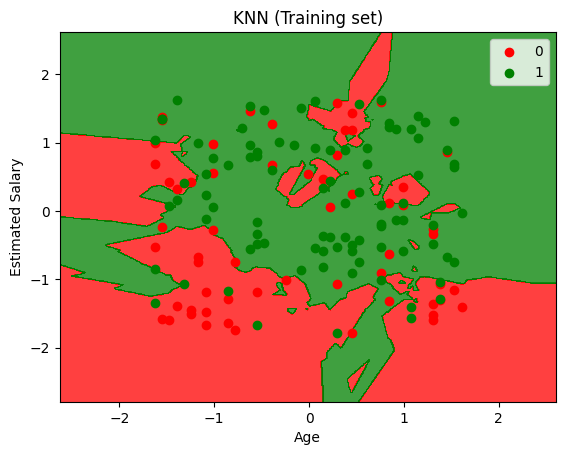

In [18]:
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('KNN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


<ipython-input-19-a0151a697f95>:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


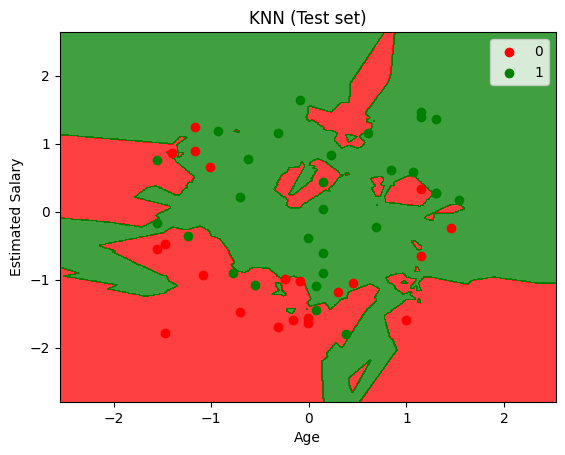

In [19]:
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c=ListedColormap(('red', 'green'))(i), label=j)
plt.title('KNN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()
